In [1]:
import cv2
import matplotlib.pyplot as plt

In [2]:
# Bringing in the configuration and frozen model files for the model

config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

model = cv2.dnn_DetectionModel(frozen_model, config_file)

In [3]:
# Reading through the labels file 

classLabels = []
file_name = 'coco.names'
with open(file_name, 'rt') as name:
    classLabels = name.read().rstrip('\n').split('\n')

In [4]:
# All possible detectable objects

print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [5]:
print(len(classLabels))

91


In [6]:
model.setInputSize(320, 320) # Size of the new frame
model.setInputScale(1.0 / 127.5) # The scale factor for the frame values
model.setInputMean((127.5, 127.5, 127.5)) # Sets the mean values for the frame
model.setInputSwapRB(True) # Sets RB for each frame

< cv2.dnn.Model 00000280B83C9710>

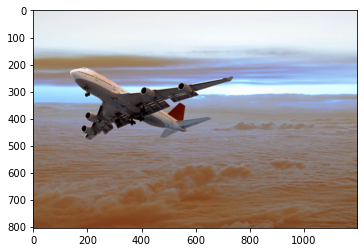

In [7]:
img = cv2.imread('plane.jpg')
plt.imshow(img)

In [8]:
ClassIndex, confidence, bbox = model.detect(img, confThreshold = .5) 

In [9]:
print(ClassIndex) # Index of classLabels
print(confidence) # A set of corresponding confidences.
print(bbox) # A set of bounding boxes.

[5]
[0.82722586]
[[146 211 584 264]]


In [10]:
font_scale = 3 
font = cv2.FONT_HERSHEY_PLAIN

# Finding the object

for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img, boxes, (255,255,0), 5)
    cv2.putText(img, classLabels[ClassInd-1], (boxes[1]+200, boxes[1]+40), font, fontScale = font_scale, color = (0,255,255), thickness=3)

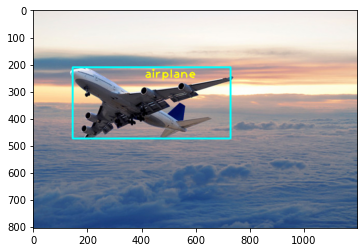

In [11]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [14]:
# Video

cap = cv2.VideoCapture('video.mp4')
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Can't open the video")
    
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN

#cap.CAP_PROP_FRAME_WIDTH = 1860
#cap.CAP_PROP_FRAME_HEIGHT = 1860

while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)
    print(ClassIndex)
    
    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <= 91):
                cv2.rectangle(frame, boxes, (255,255,0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0,255,255), thickness=3)
    cv2.imshow('objdetection', frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

()
()
[6 3 3 3]
[6 3 3 8 3 6 8]
[6 3 6 8 3]
[6 6 3 8 3 3 3]
[6 6 8 3 3 3 3]
[6 6 3 3 3 8]
[6 6 8 3 3 3 3 3]
[6 6 3 8 3 3]
[6 6 3 8 3]
[6 6 3 8 3 3]
[6 6 3 3]
[6 6 3 3 3 6 3]
[6 6 6 3 3 3 3]
[6 6 6 3 3 3 1 1]
[6 6 3 6 1 1 8 3 3]
[6 6 1 1 3 8 3 3 1]
[6 6 1 1 3 3 3 8 1 1]
[6 6 6 3 1 3 1 8 1 1 3]
[6 6 1 3 1 6 3 1 3 3 2]
[6 1 6 6 1 3 3 1 8 3]
[6 1 6 1 1 3 3 6 3 6 2 8 6]
[1 6 1 1 3 8 6 6 3 3 6 3]
[1 6 1 1 3 8 3 6 3 1]
[6 1 1 8 1 3 6 3 3 1]
[1 6 1 1 6 3 8 6]
[6 1 1 1 3 8 3 6 4 1 3 8]
[6 1 1 1 3 8 3 1 1 1 3 6 4]
[6 1 3 4 8 1 3 6 3 3]
[6 3 1 8 6 3 3 3 6 4 1]
[6 1 8 4 3 3 6 3 3 3]
[1 6 8 1 3 3 6 3]
[1 6 8 2 3 3 3]
[8 6 1 3 4 1 2 1 3 3 6]
[6 8 3 3 1 1 1 4 1]
[6 3 1 1 3 8 4 3]
[6 3 3 8 1 1 3 3]
[6 3 8 1 3 3 1 3 4]
[6 3 3 8 3 3]
[6 3 8 3 3 3 1]
[6 8 3 3 3 6 1]
[6 3 8 3 6 3]
[6 8 3 3 1 3 6]
[6 3 8 3 1 3 3]
[6 3 8 3 6 1 3]
[6 3 1 3 6 8 1 1 3 6]
[6 3 8 3 1 6 1 6 6 3 6]
[6 3 1 1 3 8 3 6 1 6 3 1]
[6 1 1 3 3 3 8 1 1 1 3]
[6 1 3 1 3 1 3 3 6]
[6 1 3 3 1 6 6 3 1 1]
[6 3 1 1 3 6 1 3 6 1 8 1]
[6 3 1 1 1 3 1 6

error: OpenCV(4.8.0) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4062: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'


In [15]:
cap.release()
cv2.destroyAllWindows()

In [ ]:
width = vcap.get(cv2.CAP_PROP_FRAME_WIDTH )
height = vcap.get(cv2.CAP_PROP_FRAME_HEIGHT )
fps =  vcap.get(cv2.CAP_PROP_FPS)

In [ ]:
while True:
    ret, frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame, confThreshold = 0.55)
    print(ClassIndex)
    
    if (len(ClassIndex) != 0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if (ClassInd <= 91):
                cv2.rectangle(frame, boxes, (255,255,0), 2)
                cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40), font, fontScale = font_scale, color = (0,255,255), thickness=3)
    cv2.imshow('objdetection', frame)
    
    if cv2.waitKey(2) & 0xff == ord('q'):
        break